In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df['Age'].isnull().sum()

177

In [15]:
sex=pd.get_dummies(df['Sex'])

In [74]:
merged=pd.concat([df,sex],axis='columns')

In [29]:
final=merged.drop(['Sex','female'],axis='columns')
final

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,1


In [54]:
final['Age']=final['Age'].fillna(df['Age'].mean())

In [55]:
x=final[['Pclass','male','Age','Fare']]
y=final['Survived']

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [57]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier().fit(x_train,y_train)

In [75]:
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [60]:
preds=model.predict(x_test)

In [71]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,preds)

In [62]:
cm

array([[95, 22],
       [20, 42]])

In [73]:
classification_report(y_test,preds,output_dict=True)

{'0': {'f1-score': 0.8189655172413793,
  'precision': 0.8260869565217391,
  'recall': 0.811965811965812,
  'support': 117},
 '1': {'f1-score': 0.6666666666666667,
  'precision': 0.65625,
  'recall': 0.6774193548387096,
  'support': 62},
 'accuracy': 0.7653631284916201,
 'macro avg': {'f1-score': 0.742816091954023,
  'precision': 0.7411684782608696,
  'recall': 0.7446925834022609,
  'support': 179},
 'weighted avg': {'f1-score': 0.7662139600590766,
  'precision': 0.7672607481175614,
  'recall': 0.7653631284916201,
  'support': 179}}

In [65]:
model.score(x_test,y_test)

0.7653631284916201

[Text(1816.0794890873017, 3187.4727272727273, 'X[1] <= 0.5\ngini = 0.477\nsamples = 712\nvalue = [432, 280]'),
 Text(888.1746031746032, 3039.2181818181816, 'X[0] <= 2.5\ngini = 0.376\nsamples = 255\nvalue = [64, 191]'),
 Text(265.7142857142857, 2890.9636363636364, 'X[2] <= 2.5\ngini = 0.08\nsamples = 143\nvalue = [6, 137]'),
 Text(157.46031746031747, 2742.7090909090907, 'X[3] <= 88.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(118.0952380952381, 2594.4545454545455, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(196.82539682539684, 2594.4545454545455, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(373.968253968254, 2742.7090909090907, 'X[3] <= 22.0\ngini = 0.068\nsamples = 141\nvalue = [5, 136]'),
 Text(275.55555555555554, 2594.4545454545455, 'X[2] <= 56.0\ngini = 0.202\nsamples = 35\nvalue = [4, 31]'),
 Text(236.1904761904762, 2446.2, 'X[3] <= 20.25\ngini = 0.161\nsamples = 34\nvalue = [3, 31]'),
 Text(157.46031746031747, 2297.9454545454546, 'X[3] <= 12.825\ngini = 0.121\

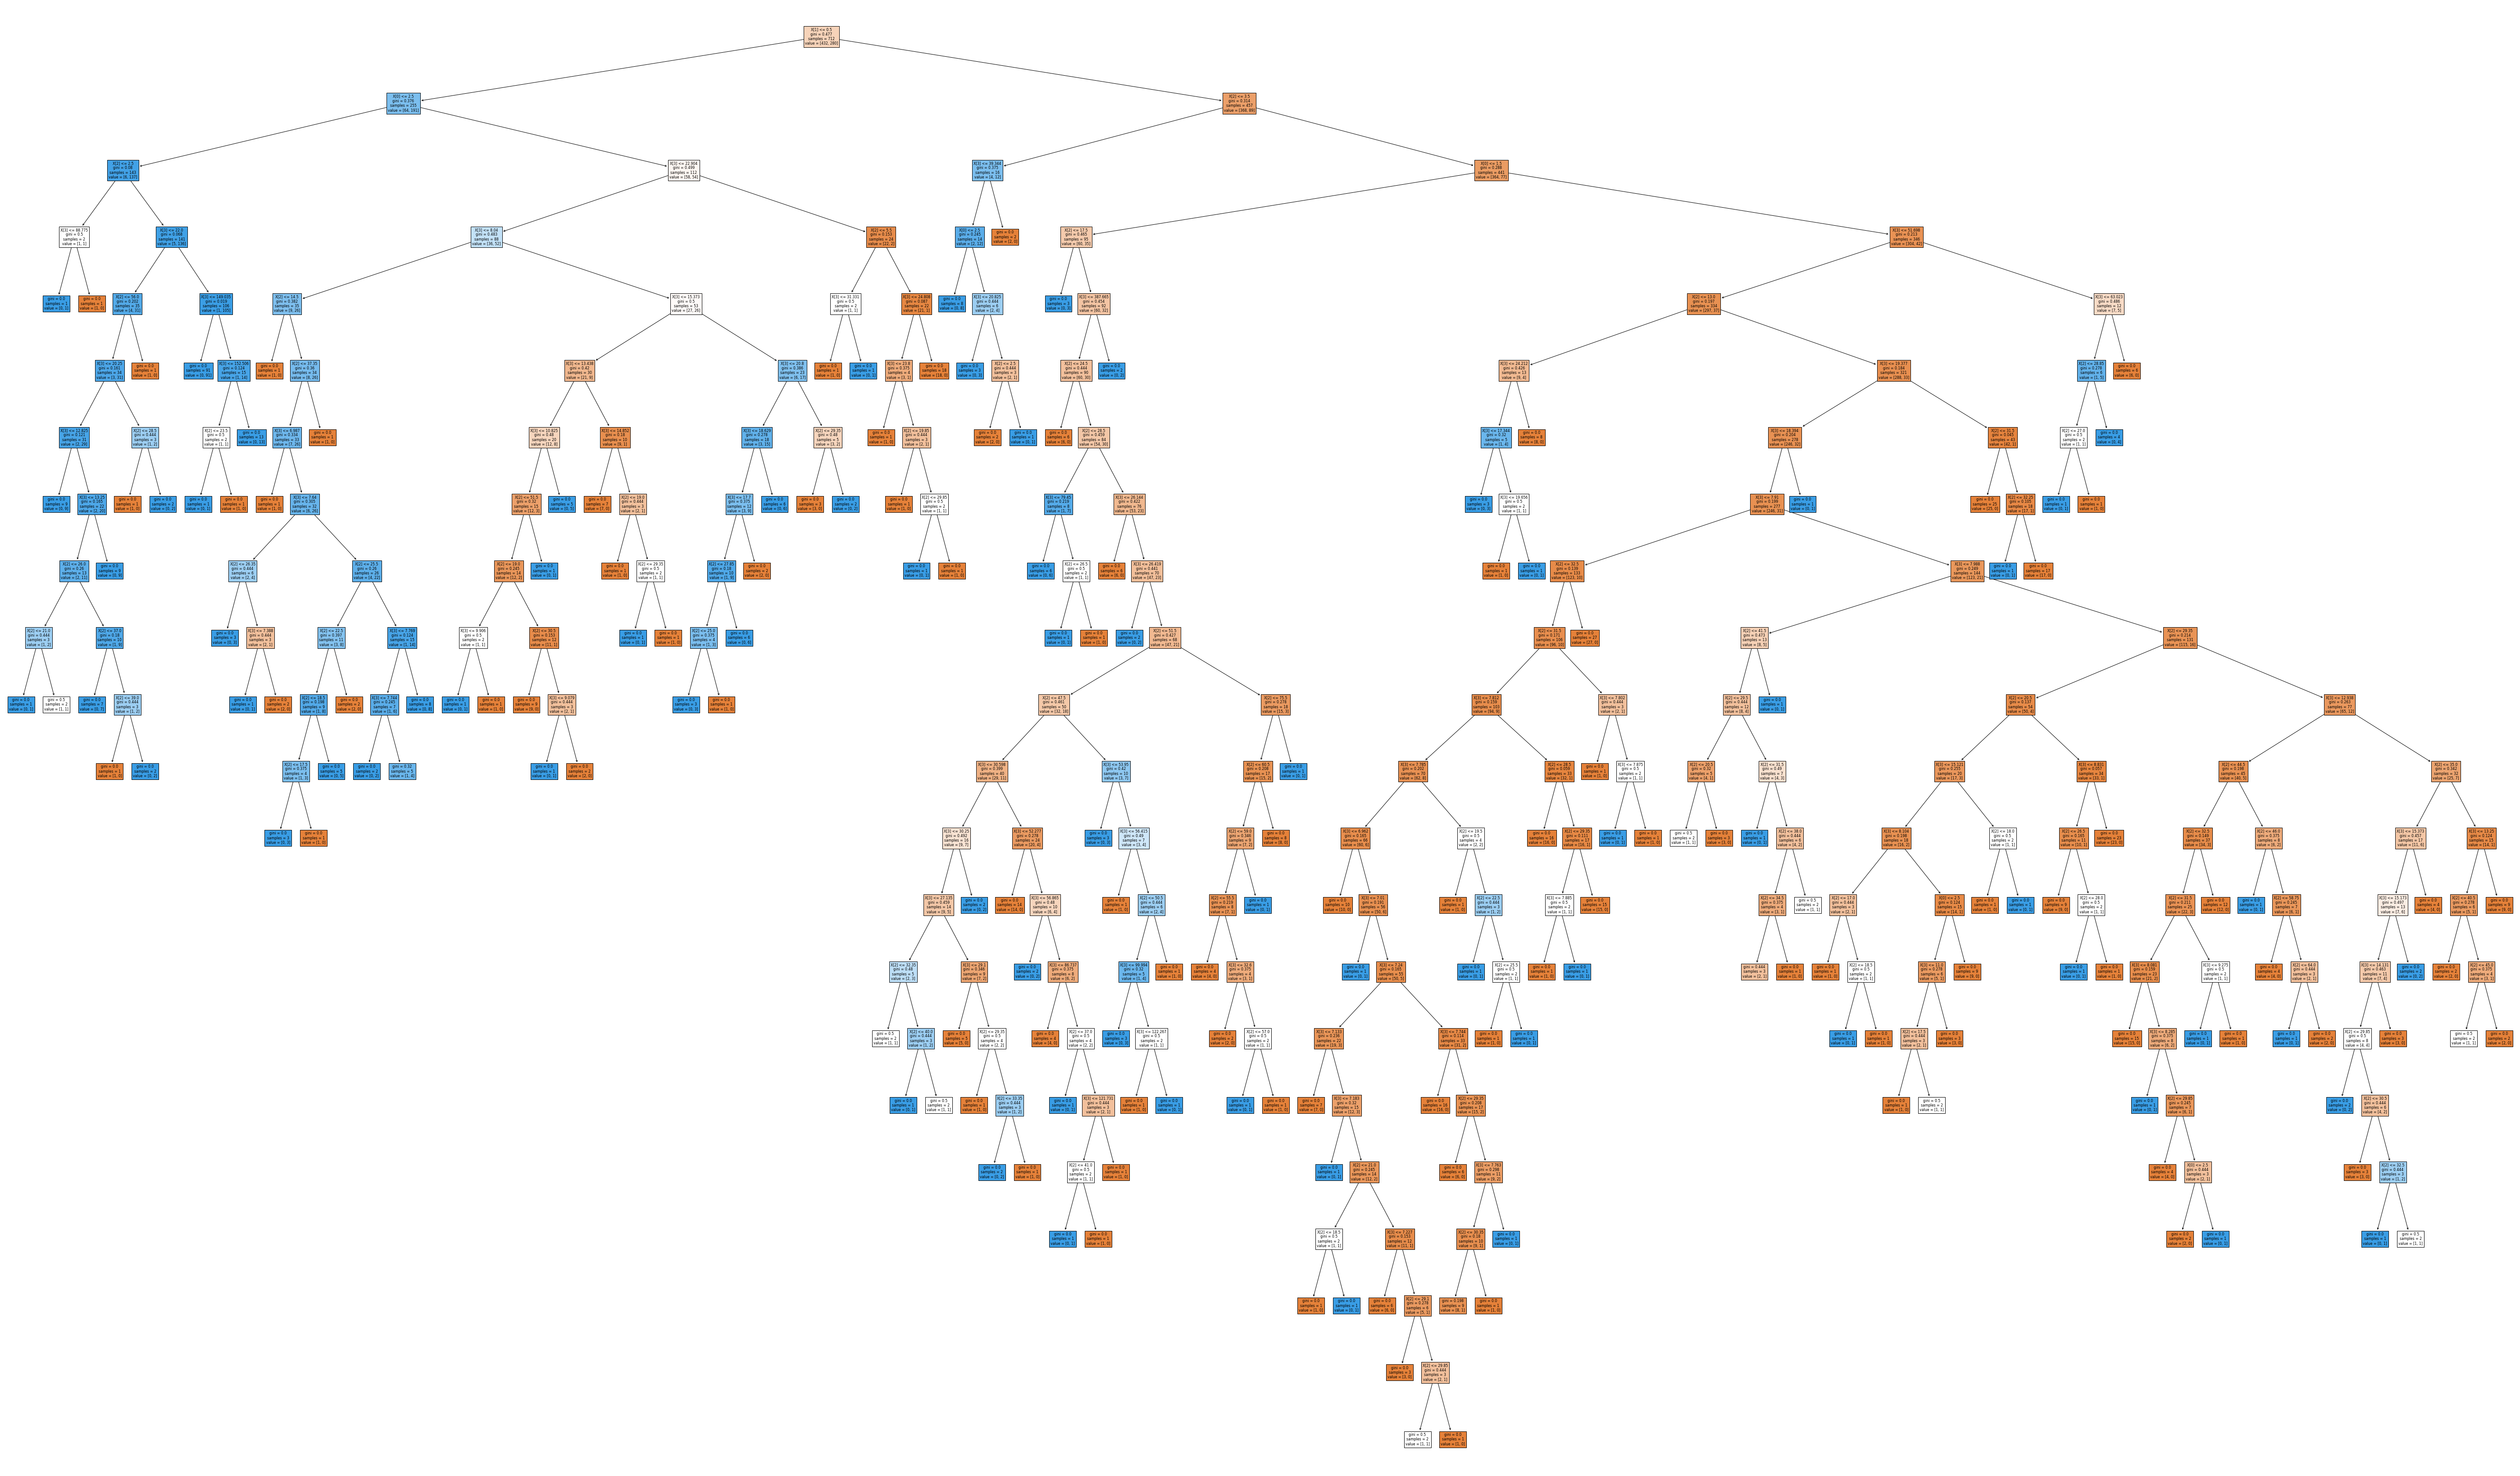

In [70]:
plt.figure(figsize=(100,60))
from sklearn.tree import plot_tree
plot_tree(model,filled=True)